## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)


In [1]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!
# I had chatGPT break the packages into groups here

# ============================================================
# Basic packages
# ============================================================
import os                             # For file and directory operations
import numpy as np                    # For numerical computing and arrays
import pandas as pd                   # For data manipulation and analysis

# ============================================================
# Visualization packages
# ============================================================
import matplotlib.pyplot as plt        # Static 2D plotting
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Interactive visualization with Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'        # Set renderer for interactive output in Colab or notebooks

# ============================================================
# Scikit-learn: Core utilities for model building and evaluation
# ============================================================
from sklearn.model_selection import train_test_split    # Train/test data splitting
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler  # Feature transformations and scaling
from sklearn.metrics import (                            # Model evaluation metrics
    mean_squared_error, r2_score, accuracy_score, 
    precision_score, recall_score, confusion_matrix, 
    classification_report
)

# ============================================================
# Scikit-learn: Linear and polynomial models
# ============================================================
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor       # For KNN

# ============================================================
# Scikit-learn: Synthetic dataset generators
# ============================================================
from sklearn.datasets import make_classification, make_regression

# ============================================================
# Scikit-learn: Naive Bayes models
# ============================================================
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [2]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    if model=='bnb' or model=='mnb':
        # Define grid that includes all binary combinations
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0.5, 1],
                 colors=['steelblue', 'darkorange'], alpha=0.2)
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='steelblue', label='Class 0', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', alpha=0.7)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Synthetic Binary Classification Data")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    plt.show()


## Naive Bayes Classifiers

Today we are going to talk about two different types of models:

- Naive Bayes classifiers (Gaussian, Bernoulli, and Multinomial)

These models are used for a variety of tasks in machine learning. Naive Bayes classifiers are fairly simple and have strong assumptions but they can perform surprisingly well for high dimensional data. They are very fast, but handle nonlinear boundaries poorly.

**Reasons to Use Naive Bayes Classifiers:**

1. They work well with text data

Naive Bayes is one of the best and simplest methods for tasks like spam detection, sentiment analysis, and document classification.
It handles large vocabularies easily and performs well even when there are thousands of features (e.g., words).

2. They are fast and efficient

Training and prediction are both very quick because the algorithm only needs to count how often each feature occurs in each class.
This makes it great for real-time applications or very large datasets.

3. They perform surprisingly well even with simple assumptions

Even though Naive Bayes assumes that all features are independent (which is rarely true in real data), it often gives accurate results even when this assumption is broken- especially when the features don't depend too much on each other.

4. They need little data to get started

Because the model is based on simple probability estimates, it can perform reasonably well even when you have small training datasets.

5. They are easy to interpret and implement

You can understand how the model makes decisions by looking at which features contribute most to each class.
This makes it a good teaching and baseline model.

6. They handle noisy or missing data fairly well

Since predictions are based on overall probability patterns, missing or slightly incorrect feature values usually don't drastically change the result.

7. They can serve as strong baselines

In many machine learning projects, Naive Bayes is used as a baseline model. They serve as a simple first approach: easy to compare more complex models against (like decision trees or neural networks).


## Understanding Naive Bayes

Naive Bayes classifiers use **probabilities** to decide which class something most likely belongs to.  They start with what we already know about how common each class is, and then **update those beliefs** based on the features of new data we see.

## How It Works

1. **Start with prior knowledge** 

Before looking at the data, the model already has an idea of how frequent each class is.  
   
*Example:* Maybe 80% of emails are "not spam" and 20% are "spam."

3. **Look at the evidence**  

The model checks which features appear (like certain words in an email).  It knows from past examples how common each feature is for each class.

4. **Combine the clues**  

It combines all the clues to see which class is *most likely* for this new data.  It assumes that all clues are independent - that's why it's called **Naive** Bayes.


6. **Pick the most likely class**  
   Finally, it chooses the class with the highest overall probability.



## Example: Spam Filter

Imagine we're trying to classify an email as **spam** or **not spam**.

- The word **free** appears often in spam.  
- The word **meeting** appears often in normal emails.  

If a new email says **Free meeting this Friday!**, Naive Bayes looks at both clues and estimates which class (spam or not) is more likely, based on what it has learned.

Even if the email is a mix of both words, the model uses probability to make the best guess.

## Example: The Guessing Game

Think of Naive Bayes as a detective guessing what kind of event a person is attending, just from what they are wearing.

| Clue | Beach | Wedding | Business Meeting |
|------|--------|----------|------------------|
| Wearing sunglasses | ✅ | ❌ | ❌ |
| Wearing formal shoes | ❌ | ✅ | ✅ |
| Wearing a tie | ❌ | ✅ | ✅ |

If someone is wearing **sunglasses** and **formal shoes** then the detective uses both clues to decide - maybe it's most likely a **wedding**, even though either clue alone could fit more than one event.  

That's exactly what Naive Bayes does:  
It combines independent clues to make the most probable guess about the class.


## Naive Bayes Classifiers

Naive Bayes classifiers are probabilistic models based on **Bayes' theorem**, which relates the conditional and marginal probabilities of random events.

Notation: 

$P(x)$ is the probability of observation/input $x$ and $P(C_k)$ is the probability of class $C_k$, these are just normal probabilities. What is the chance of randomly drawing input $x$ or class $C_k$ from a bag?

The conditional probability, $ P(x | C_k) $, is the probability of the observation being $x$ given that we are looking in class $C_k$ and we say "probability of $x$ given $C_k$". 

We can flip the conditional probability using Bayes' Theorem

$$
P(C_k | x) = \frac{P(x | C_k) P(C_k)}{P(x)}
$$

where:
- $ P(C_k | x) $: posterior probability of class $ C_k $ given input $ x $
- $ P(x | C_k) $: likelihood of the data given the class
- $ P(C_k) $: prior probability of the class
- $ P(x) $: evidence term (same for all classes)

We can solve for any term in the theorem if we know the other parts.

The "naive" assumption is that the features are **conditionally independent** given the class. So given a bunch of observations $x_i$ for class $C_k$ we can get the total conditional probability by just multiplying them.

$$
P(x | C_k) = \prod_{i=1}^n P(x_i | C_k)
$$

There are different assumptions that we can make about the underlying probability distributions - aka how the data is spread out.


## Gaussian Naive Bayes

Used when features are continuous and approximately normally distributed. You should try to check for a normal distribution in your data, but even data that breaks this rule slightly can still work.

**Strengths**
- Works well for continuous features with approximately normal distributions.
- Very fast and requires little training data.

**Weaknesses**
- Assumes independence among features.
- Sensitive to features that are not normally distributed.

**Key parameter**
- `var_smoothing`: small positive number added to variances for numerical stability.



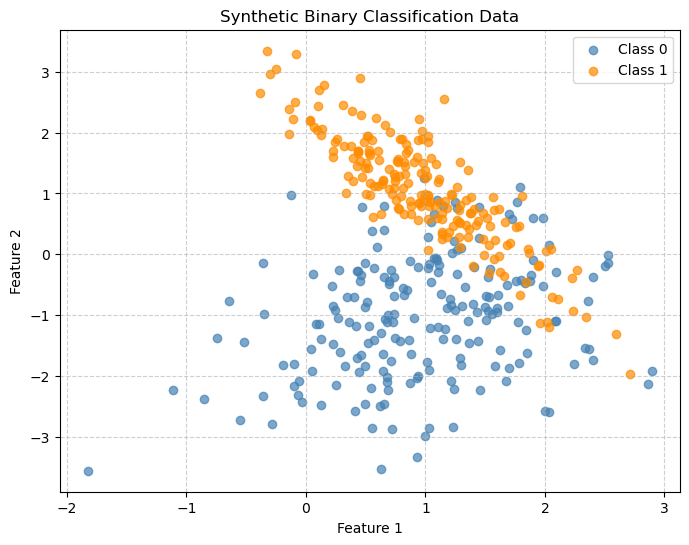

In [3]:
# Generate synthetic 2D data
X, y = make_classification(n_samples=400, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='steelblue', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', alpha=0.7)

# Add labels and legend
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [4]:
df = pd.DataFrame(X,columns=['Feature 1', 'Feature 2'])
df['Label'] = y
df

,Feature 1,Feature 2,Label
0,1.431868,-0.953095,0
1,0.323473,-1.833522,0
2,0.977841,1.501977,1
3,1.986525,0.602109,0
4,1.356117,0.280041,1
...,...,...,...
395,1.235417,-2.220195,0
396,0.695441,1.069858,1
397,0.497609,-1.829259,0
398,1.014075,1.287071,1


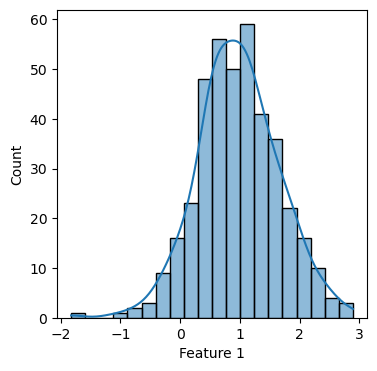

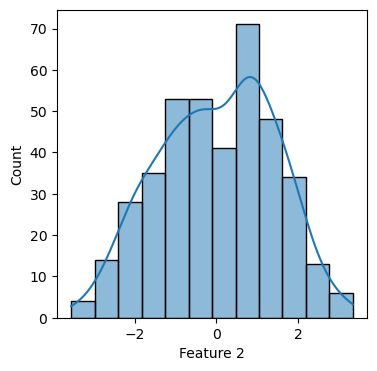

In [5]:
## Look for Gaussian distribution
continuous_numeric_features = ['Feature 1','Feature 2']
for feature in continuous_numeric_features:
    plt.figure(figsize=(4, 4))  # smaller figure size
    sns.histplot(df[feature],kde=True)
    plt.show()


In [6]:
#Test train split/
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [7]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  8]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        39

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.87        80



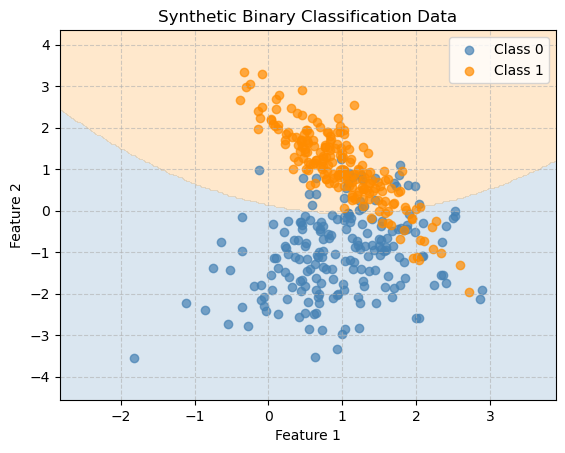

In [8]:
plot_decision_boundary(gnb, X, y, "Gaussian Naive Bayes Decision Boundary")

In [9]:
y_pred = gnb.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.8725


## Bernoulli Naive Bayes

The Bernoulli Naive Bayes model works well with binary features, though it may struggle when features are correlated. The model assumes that each feature can take only two values (e.g., 0 or 1) and learns how likely each feature is to appear in each class.

It is most useful when **the presence or absence of a feature** matters more than how many times it occurs.

1. Text classification with binary word features
   - When you care whether a word appears in a document, not how many times.  
   - Example: Email spam detection using word present = 1 / word absent = 0.

2. Document or topic classification 
   - News or article classification using binary bag-of-words representation.

3. Feature sets with yes/no indicators 
   - Customer behavior: whether a person clicked an ad (1) or not (0).  
   - Medical diagnosis: whether a symptom is present (1) or absent (0).


**When *Not* to Use It**

- If your features are **counts** (e.g., word frequencies), use **Multinomial Naive Bayes** instead.  
- If your features are **continuous numeric values** (e.g., measurements, sensor data), use **Gaussian Naive Bayes**.


In [10]:
np.random.seed(42)
n_samples = 200
X = np.random.randint(0, 2, (n_samples, 2))

# Define labels
# Class 1 if either feature is 1, else Class 0
y = np.logical_or(X[:, 0], X[:, 1]).astype(int)

In [11]:
df = pd.DataFrame(X,columns=['Feature 1', 'Feature 2'])
df['Label - OR'] = y
df

,Feature 1,Feature 2,Label - OR
0,0,1,1
1,0,0,0
2,0,1,1
3,0,0,0
4,0,1,1
...,...,...,...
195,0,0,0
196,1,1,1
197,0,1,1
198,1,1,1


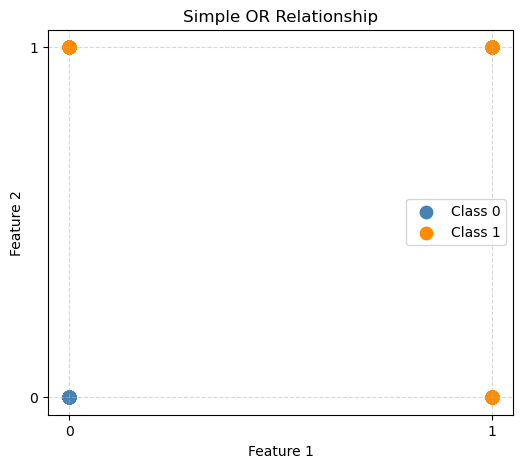

In [12]:
plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='steelblue', label='Class 0', s=80)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', s=80)

plt.title("Simple OR Relationship")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

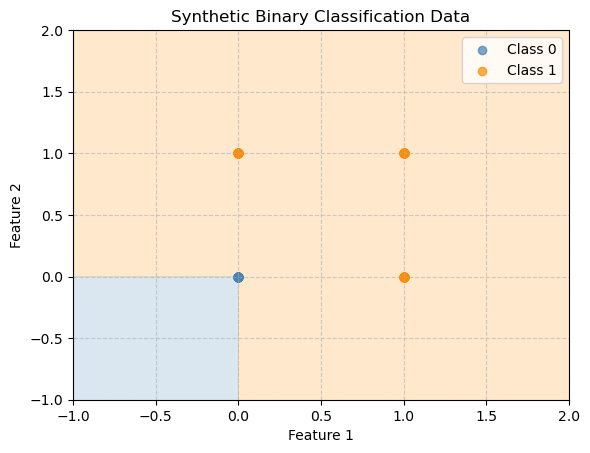

In [13]:
bnb = BernoulliNB()
bnb.fit(X, y)
plot_decision_boundary(bnb, X, y, "Bernoulli Naive Bayes Decision Boundary")

In [14]:
y_pred = bnb.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


Naive Bayes works perfectly here. We see that with the OR function the two features are completely independent, there is no need for feature interaction to decide if OR is true.

## Let's break the algorithm!

In [15]:
np.random.seed(42)
n_samples = 200
X = np.random.randint(0, 2, (100, 2))
y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)  # XOR pattern

In [16]:
df = pd.DataFrame(X,columns=['Feature 1', 'Feature 2'])
df['Label - XOR'] = y
df

,Feature 1,Feature 2,Label - XOR
0,0,1,1
1,0,0,0
2,0,1,1
3,0,0,0
4,0,1,1
...,...,...,...
95,0,0,0
96,0,0,0
97,0,1,1
98,1,1,0


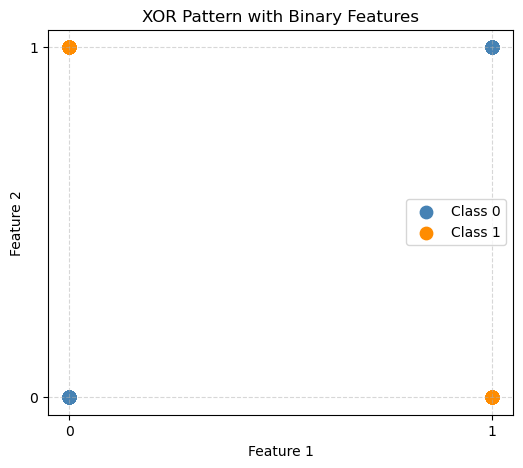

In [17]:
# Plot the data
plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='steelblue', label='Class 0', s=80)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', s=80)

plt.title("XOR Pattern with Binary Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

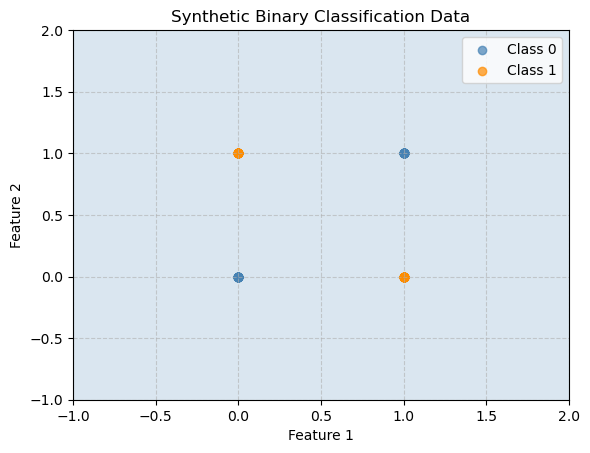

In [18]:
bnb = BernoulliNB()
bnb.fit(X, y)
plot_decision_boundary(bnb, X, y, "Bernoulli Naive Bayes Decision Boundary")


In [19]:
y_pred = bnb.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.52


Bayes' classifier fails here because in XOR, the class depends on the interaction between features - something Naive Bayes cannot model well. Remember a big assumption is that the features are independent!

## Correlation Heatmap

To see if your features are independent we can look to see how highly correlated they are with the target variable. Here are our two examples:

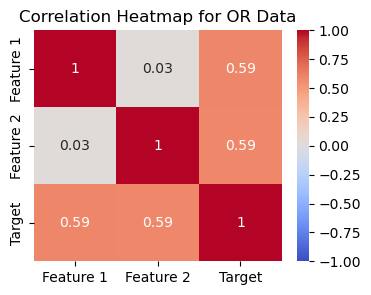

In [20]:
np.random.seed(42)
n_samples = 200
X = np.random.randint(0, 2, (n_samples, 2))
y = np.logical_or(X[:, 0], X[:, 1]).astype(int)

# Put the data into a data frame:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Compute correlation matrix
corr = df.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for OR Data')
plt.show()

In the first example using **OR** we see that the two variables are not very correlated with each other, low correlation scores, but they are independently highly correlated with the target.

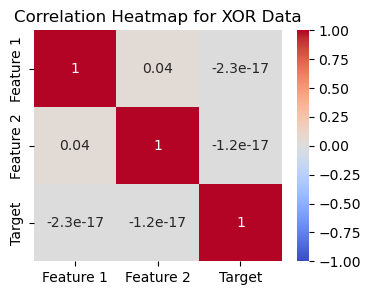

In [21]:
np.random.seed(42)
n_samples = 200
X = np.random.randint(0, 2, (100, 2))
y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)  # XOR pattern

# Put the data into a data frame:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Compute correlation matrix
corr = df.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for XOR Data')
plt.show()

In the second example using **XOR** we see that the two variables are not very correlated with each other, low correlation scores, but they are also not independently highly correlated with the target. Together they determine the output, so they are dependent on each other.

## Multinomial Naive Bayes

Multinomial Naive Bayes is best used for data where the features represent **discrete counts or frequencies**, such as how many times a word appears in a document or how many events of a certain type occur.

It assumes that:
- Each feature represents a **count** (non-negative integer).  
- Features are **conditionally independent** given the class.  
- The total number of counts can vary across samples.


1. **Text classification using word counts**
   - Example: Spam detection, news categorization, or sentiment analysis.
   - Each feature represents how often a word appears in a document.

2. **Document or topic modeling**
   - Assign documents to topics (e.g., sports, politics, science).
   - Each topic has a characteristic distribution of word frequencies.

3. **Bag-of-words models in Natural Language Processing (NLP)**
   - Suitable when features are integer counts (not just presence/absence).

4. **Other count-based features**
   - Customer behavior: number of purchases, clicks, or actions of different types.
   - Medical data: count of symptoms or test results.

**When *Not* to Use It**

- If your features are **binary (0/1)** instead use **Bernoulli Naive Bayes** instead.  
- If your features are **continuous values** instead use **Gaussian Naive Bayes**.  
- If your features are highly dependent on each other (e.g., strong correlations), Naive Bayes models in general may not perform well.


In [22]:
np.random.seed(42)
n_samples = 200

# Feature 1: mostly high counts for class 1
X1_class0 = np.random.randint(0, 3, size=(50, 1))
X1_class1 = np.random.randint(5, 10, size=(50, 1))
# Feature 2: mostly high counts for class 0
X2_class0 = np.random.randint(5, 10, size=(50, 1))
X2_class1 = np.random.randint(0, 3, size=(50, 1))

X = np.vstack([np.hstack([X1_class0, X2_class0]), np.hstack([X1_class1, X2_class1])])
y = np.array([0]*50 + [1]*50)

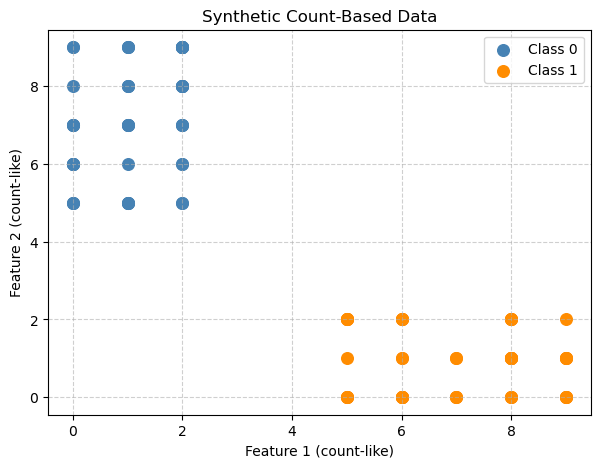

In [23]:
plt.figure(figsize=(7, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='steelblue', label='Class 0', s=70)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', s=70)
plt.xlabel("Feature 1 (count-like)")
plt.ylabel("Feature 2 (count-like)")
plt.title("Synthetic Count-Based Data")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

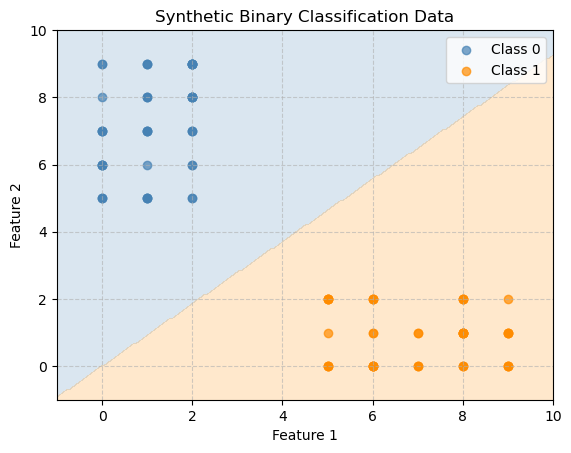

In [24]:
mnb = MultinomialNB()
mnb.fit(X, y)
plot_decision_boundary(mnb, X, y, "Multinomial Naive Bayes Decision Boundary")


In [25]:
y_pred = mnb.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


## Application - Spam Collection

Here we will explore a more realistic example of when we might use Naive Bayes' Classification. 

*From https://www.kaggle.com/code/jeffysonar/spam-filter-using-naive-bayes-classifier*

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file, encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

Path to dataset files: /home/bellajagu/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [28]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Text Based Data

When using data that is text based there is quite a bit of cleaning that you need to do. We need to 

**Clean and normalize text**

- Remove punctuations
- Remove all stopwords
- Apply stemming (converting to normal form of word).For example, 'driving car' and 'drives car' becomes drive car

**Convert the text into vectors**

This will let us pass numbers into our model so it understand the text.

**Train and test our classifier**


## Clean and Normalize

First we will install the NLTK package! NLTK stands for Natural Language Toolkit. It is used for:

- Tokenizing text into words or sentences

- Removing stopwords

- Stemming or lemmatization

- Part-of-speech tagging

- Parsing and text classification

- Working with corpora and linguistic datasets

It is widely used in teaching and prototyping Natural Language Processing NLP projects because it provides ready-to-use tools and datasets.

In [29]:
#!conda install -y nltk

In [30]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    '''
    Preprocess text by first making sure it is lower case.
    Then remove punctuation and words that are too common (stopwords)

    Stopwords are common words in a language that are usually filtered 
    out before processing text because they carry little semantic meaning for many tasks
    '''
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bellajagu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

We can apply this processing to the first twenty lines of our data to see what is created.

In [32]:
df['message'][:20].apply(process)

0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, watch]
17    [eh, u, rememb, 2, spell, name, ye, v, nau

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], 
                                                    df['label'], 
                                                    test_size=0.20, 
                                                    random_state = 42)

## Convert to vectors

Machine learning models need **numbers**, so we have to convert words into vectors. There are lots of ways to convert words to numbers:

1. One-Hot Encoding
- Each word → a vector of 0s and a single 1 for that word.
- Simple but **sparse** and ignores similarity.

2. Bag-of-Words (Count Vectors)
- Count how many times each word appears in a document.
- Keeps frequency info but **ignores word order**.

3. TF-IDF
- Like Bag-of-Words but **weights words by importance**.
- Down-weights common words like "the" or "and".

4. Word Embeddings
- Each word → dense vector capturing **meaning**.
- Similar words have **similar vectors**.
- Examples: Word2Vec, GloVe, FastText.

5. Contextual Embeddings
- Word vectors **depend on the sentence**.
- Examples: BERT, GPT.
- Captures different meanings of the same word depending on context.

**We will use Bag-of-words!**

We will use the TfidfVectorizer from sklearn to create these features. TF (Term Frequency): How often a word appears in a document. IDF (Inverse Document Frequency): Down-weights words that appear in many documents (common words like “the”, “and”).

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# Create the vectorizer
# Tell it to use the process function from above
tfidfv = TfidfVectorizer(analyzer=process)
# Fit and convert our messages
data_train = tfidfv.fit_transform(X_train)

In [36]:
# Let's look at what is in here
words = X_train.iloc[0]
words

"No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked."

In [37]:
print(tfidfv.transform([words]))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 7168)>
  Coords	Values
  (0, 1368)	0.43016295308410485
  (0, 1684)	0.30028124512918414
  (0, 3048)	0.32385852311251045
  (0, 3342)	0.3832079251829102
  (0, 4211)	0.3525184383709841
  (0, 4316)	0.43016295308410485
  (0, 5900)	0.2450298447888547
  (0, 7050)	0.32203929925898256


In [38]:
# Create the model
mnb = MultinomialNB()
mnb.fit(data_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [39]:
data_test = tfidfv.transform(X_test)
preds=mnb.predict(data_test)

In [40]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != preds[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1115
Number of wrong of predictions 42


In [41]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1007
        spam       0.72      1.00      0.84       108

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115



Looking at precision column (for ham, it is 1.00), we can say that all the wrong predictions came from spam predicted as ham. It is ok and cost of predicting spam as ham is negligible to that of predicting ham as spam. This is a case where we would want high precision on the ham category!

In [42]:
def detect_spam(words):
    d = tfidfv.transform([words])
    pred=mnb.predict(d)
    return str(pred[0])

In [43]:
detect_spam('Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.')

'spam'